In [1]:
import numpy as np

def read_xyz(filename):
    """Reads an XYZ trajectory file and returns a list of frames with atomic coordinates."""
    frames = []
    with open(filename, 'r') as file:
        while True:
            try:
                num_atoms = int(file.readline().strip())
                file.readline()
                frame = []
                for _ in range(num_atoms):
                    line = file.readline().strip().split()
                    coords = list(map(float, line[1:4]))
                    frame.append(coords)
                frames.append(np.array(frame))
            except ValueError: 
                break
    return np.array(frames)


def calculate_rmse_between_frames(frame1, frame2):
    """Calculates the RMSE between two frames for the given atom indices."""
 
    coords1 = frame1[0:24]
    coords2 = frame2[0:24]

    squared_diff = np.square(coords1 - coords2)
    rmse = np.sqrt(np.mean(squared_diff))
    return rmse

def compute_total_force(filename, init=False, all_forces=False):
    """Compute the total magnitud of the force as the square root of the sume of all of the force components squared as QE)
    
    Refer to https://eamonnmurray.gitlab.io/modelling_materials/lab05/"""
    
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    if all_forces:
        indices = [i for i, line in enumerate(lines) if "Total forces :" in line]
    else:
        if init:
            indices = [next(i for i, line in enumerate(lines) if "Total forces :" in line)]
        else:
            indices = [max(i for i, line in enumerate(lines) if "Total forces :" in line)]

    force_magnitudes = []
    for start_index in indices:
        
        force_lines = lines[start_index + 1 : start_index + 25]
        force_array = np.array([list(map(float, line.strip("[] \n").split())) for line in force_lines])
        # print(force_array)
        total_force_magnitude = np.sqrt(np.sum(force_array**2))
        force_magnitudes.append(total_force_magnitude)
    
    return force_magnitudes

In [2]:
from ase.io.trajectory import Trajectory
from ase.io import read
import matplotlib.pyplot as plt
import matplotlib as mpl

## 1. Read a reference structure

In [3]:
bench_atoms = read("./QM-sdft/511_new.xyz")# Optimized structure with bigger cell! 
bench_atoms = bench_atoms[0:24]

## 2. Read trajectory of the relaxation

In [4]:
traj_qmmm = Trajectory(f'./QM-qmmm/opt.traj')

traj_qmqm_1 = Trajectory(f'./QM-sdft/opt_bk.traj')
traj_qmqm_2 = Trajectory(f'./QM-sdft/opt.traj')[1:]
traj_qmqm = [traj_qmqm_1,traj_qmqm_2]

## 3. Calculate RMSE

In [6]:
rmse_qmqm = []

for mol in traj_qmqm[0]:
    mol_test = mol[0:24]
    frame1 = bench_atoms.get_positions()
    frame2 = mol_test.get_positions()
    rmse = calculate_rmse_between_frames(frame1,frame2)
    print(f"RMSE for atoms 0-24: {rmse:.6f}")
    rmse_qmqm.append(rmse)
for mol in traj_qmqm[1]:
    mol_test = mol[0:24]
    frame1 = bench_atoms.get_positions()
    frame2 = mol_test.get_positions()
    rmse = calculate_rmse_between_frames(frame1,frame2)
    print(f"RMSE for atoms 0-24: {rmse:.6f}")
    rmse_qmqm.append(rmse)


RMSE for atoms 0-24: 0.354237
RMSE for atoms 0-24: 0.352447
RMSE for atoms 0-24: 0.346306
RMSE for atoms 0-24: 0.324398
RMSE for atoms 0-24: 0.303595
RMSE for atoms 0-24: 0.292334
RMSE for atoms 0-24: 0.281195
RMSE for atoms 0-24: 0.273109
RMSE for atoms 0-24: 0.267698
RMSE for atoms 0-24: 0.261992
RMSE for atoms 0-24: 0.254076
RMSE for atoms 0-24: 0.249256
RMSE for atoms 0-24: 0.243747
RMSE for atoms 0-24: 0.240152
RMSE for atoms 0-24: 0.237033
RMSE for atoms 0-24: 0.232886
RMSE for atoms 0-24: 0.228096
RMSE for atoms 0-24: 0.224125
RMSE for atoms 0-24: 0.220928
RMSE for atoms 0-24: 0.217772
RMSE for atoms 0-24: 0.213678
RMSE for atoms 0-24: 0.208068
RMSE for atoms 0-24: 0.202727
RMSE for atoms 0-24: 0.197869
RMSE for atoms 0-24: 0.193359
RMSE for atoms 0-24: 0.189689
RMSE for atoms 0-24: 0.185910
RMSE for atoms 0-24: 0.183102
RMSE for atoms 0-24: 0.179485
RMSE for atoms 0-24: 0.174813
RMSE for atoms 0-24: 0.168533
RMSE for atoms 0-24: 0.159927
RMSE for atoms 0-24: 0.150070
RMSE for a

In [7]:
rmse_qmmm = []
for mol_2 in traj_qmmm:
    mol_test_2 = mol_2[0:24]
    frame1 = bench_atoms.get_positions()
    frame2 = mol_test_2.get_positions()
    rmse = calculate_rmse_between_frames(frame1,frame2)
    print(f"RMSE for atoms 0-24: {rmse:.6f}")
    rmse_qmmm.append(rmse)

RMSE for atoms 0-24: 0.354237
RMSE for atoms 0-24: 0.352430
RMSE for atoms 0-24: 0.345665
RMSE for atoms 0-24: 0.321771
RMSE for atoms 0-24: 0.300794
RMSE for atoms 0-24: 0.289365
RMSE for atoms 0-24: 0.280712
RMSE for atoms 0-24: 0.273955
RMSE for atoms 0-24: 0.262776
RMSE for atoms 0-24: 0.258989
RMSE for atoms 0-24: 0.254446
RMSE for atoms 0-24: 0.246959
RMSE for atoms 0-24: 0.242867
RMSE for atoms 0-24: 0.237835
RMSE for atoms 0-24: 0.235010
RMSE for atoms 0-24: 0.229369
RMSE for atoms 0-24: 0.224275
RMSE for atoms 0-24: 0.220575
RMSE for atoms 0-24: 0.217454
RMSE for atoms 0-24: 0.213588
RMSE for atoms 0-24: 0.209116
RMSE for atoms 0-24: 0.203163
RMSE for atoms 0-24: 0.197758
RMSE for atoms 0-24: 0.192811
RMSE for atoms 0-24: 0.189172
RMSE for atoms 0-24: 0.185798
RMSE for atoms 0-24: 0.182409
RMSE for atoms 0-24: 0.178700
RMSE for atoms 0-24: 0.174570
RMSE for atoms 0-24: 0.169188
RMSE for atoms 0-24: 0.162695
RMSE for atoms 0-24: 0.155327
RMSE for atoms 0-24: 0.148977
RMSE for a

In [8]:
## 4. Plot RMSE

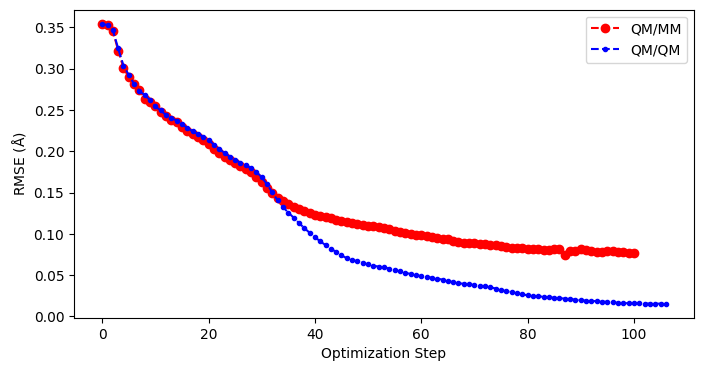

In [9]:
fig, ax = plt.subplots(1,figsize=(8,4))

ax.plot(rmse_qmmm,'ro--',label="QM/MM")
ax.plot(rmse_qmqm,'b.--',label="QM/QM")
ax.set_ylabel(r"RMSE ($\mathrm{\AA}$)")
ax.set_xlabel(r"Optimization Step")
ax.legend()

## 5. Plot Forces

In [10]:
qmqm_for_1 = compute_total_force(f"./QM-sdft/log_bk", all_forces=True)
qmqm_for_2 = compute_total_force(f"./QM-sdft/log", all_forces=True)
qmqm_for = np.concatenate((qmqm_for_1,qmqm_for_2[1:])) # the 1 is to avoid repeating geom from restart

In [11]:
qmmm_for = compute_total_force(f"./QM-qmmm/log", all_forces=True)

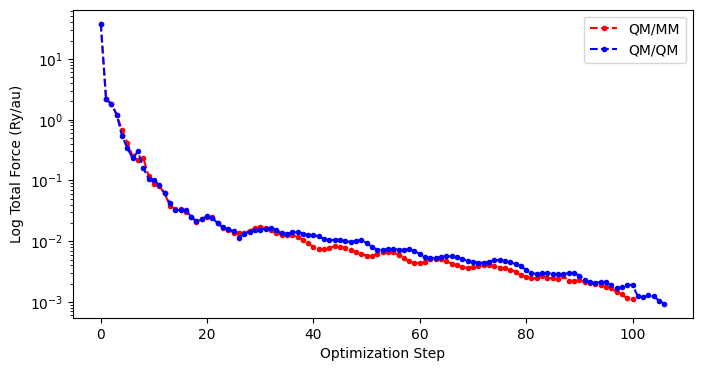

In [12]:
fig, ax = plt.subplots(1,figsize=(8,4))

ax.plot(qmmm_for,'r.--',label='QM/MM')
ax.plot(qmqm_for,'b.--',label='QM/QM')

ax.set_yscale("log")
ax.set_ylabel("Log Total Force (Ry/au)")

# ax.set_ylabel("Total Force (Ry/au)")

ax.set_xlabel(r"Optimization Step")
plt.legend()

## 6. Plot Energies

In [13]:
energy_qmqm_pert4_1 = np.loadtxt('./QM-sdft/opt_bk.log',usecols=3,skiprows=1)
energy_qmqm_pert4_2 = np.loadtxt('./QM-sdft/opt.log',usecols=3,skiprows=103)

In [16]:
energy_qmqm_pert4 = np.concatenate((energy_qmqm_pert4_1,energy_qmqm_pert4_2))

In [14]:
energy_qmmm_pert4 = np.loadtxt('./QM-qmmm/opt.log',usecols=3,skiprows=1)

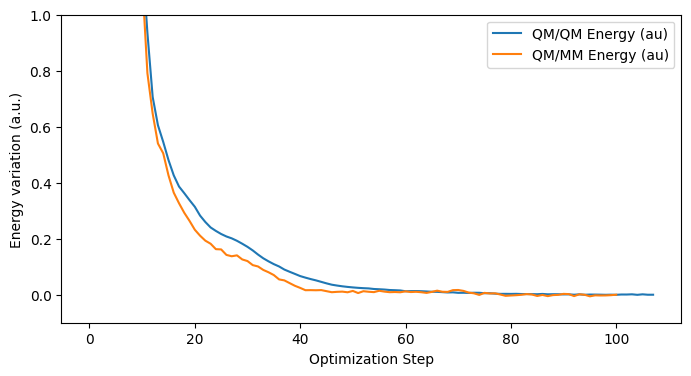

In [17]:
fig, ax = plt.subplots(1,figsize=(8,4))

ax.plot(energy_qmqm_pert4-energy_qmqm_pert4[-1],label='QM/QM Energy (au)')
ax.plot(energy_qmmm_pert4-energy_qmmm_pert4[-1],label='QM/MM Energy (au)')

ax.set_ylim([-0.1,1])
ax.set_ylabel("Energy variation (a.u.)")
ax.set_xlabel(r"Optimization Step")
plt.legend()